#**The Sparks Foundation**
#Data Science and Buisness Analytics intern

#Abdallah Fekry Mohammed
#Task6
#Prediction using Decision Tree Algorithm

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from time import process_time
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt


In [37]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
x = df.iloc[:,1:-1]
y = df.iloc[:,5]
# converting y into numeric
y = y.astype('category').cat.codes
y.unique()

array([0, 1, 2], dtype=int8)

#Splitting Data

In [54]:
x_train, x_test, y_train,y_test = train_test_split(x,y, train_size=0.8, random_state=14)

In [55]:
model = tree.DecisionTreeClassifier()
start_time = process_time()
model.fit(x_train , y_train)
end_time = process_time()
t = end_time - start_time
yp = model.predict(x_test)
score =accuracy_score(y_test,yp)


In [56]:
print("By using Decision Tree Calssifier\n\n",
      "Accuracy:",round(score*100,3),"%",
      "\nFitting time: ",round(t,3),'s'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp),sep='')

By using Decision Tree Calssifier

Accuracy:96.667%
Fitting time: 0.004s

Confusion Matrix
[[14  0  0]
 [ 0  9  0]
 [ 0  1  6]]


Decision Tree Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

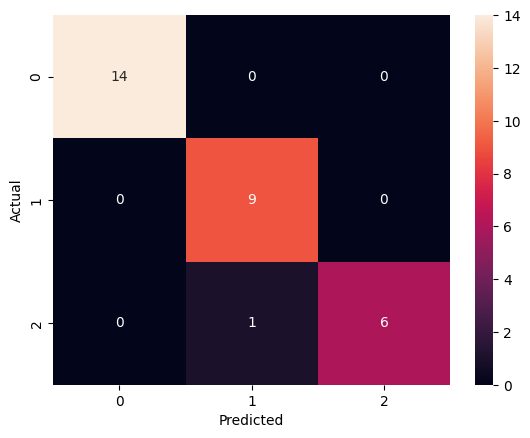

In [57]:
print("Decision Tree Heatmap\n")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True)

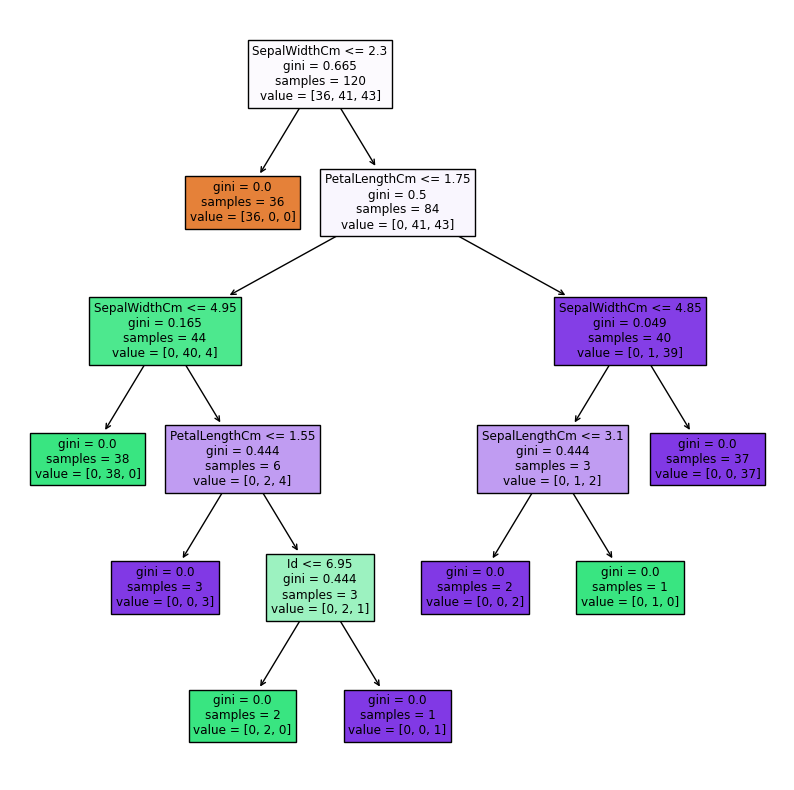

In [58]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True,feature_names=df.columns)
plt.show()

In [79]:
print(df.Species.unique(),y.unique(), sep='\n')

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 1 2]


#predicting a random element
-> run these cell everytime will give you a different value & output <-

In [112]:
import random as r
# where n is a random index in y_test
n = r.randint(0,len(x_test.values))
yp1 = model.predict([x_test.values[n]])
print("at index {}, the values are {}, and the output is:".format(n,x_test.values[n]))
if yp1 == 0:
  print("Class 0: Iris-setosa")
elif yp1 == 1:
  print("Class 1: Iris-versicolor")
else:
  print("Class 2: Iris-virginica")

at index 25, the values are [6.7 2.5 5.8 1.8], and the output is:
Class 2: Iris-virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
